#Project20-To perform EDA and to predict whether the customer will churn or not on the basis of many other factors/parameters.

In [386]:
#Importing some neccessary libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [387]:
df_churn=pd.read_csv('Telecom_customer_churn.csv')
df_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [388]:
#Checking for data types
df_churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [389]:
#Checking for null values
df_churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

We can see that there are no null values in our dataset but still we have to check it closely for any missing,nan,? values to clean our dataset

In [390]:
#Checking for unique values for each of the column to look for any missing,nan,inappropriate values
col=df_churn.columns
for val in col:
    print(val)
    print(df_churn[val].unique())
    print()
   

customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

gender
['Female' 'Male']

SeniorCitizen
[0 1]

Partner
['Yes' 'No']

Dependents
['No' 'Yes']

tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

PhoneService
['No' 'Yes']

MultipleLines
['No phone service' 'No' 'Yes']

InternetService
['DSL' 'Fiber optic' 'No']

OnlineSecurity
['No' 'Yes' 'No internet service']

OnlineBackup
['Yes' 'No' 'No internet service']

DeviceProtection
['No' 'Yes' 'No internet service']

TechSupport
['No' 'Yes' 'No internet service']

StreamingTV
['No' 'Yes' 'No internet service']

StreamingMovies
['No' 'Yes' 'No internet service']

Contract
['Month-to-month' 'One year' 'Two year']

PaperlessBilling
['Yes' 'No']

PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'

We can see that there is no inappropriate/nan/? values present in our data set which means our dataset is clean but there are many other columns which don't have much to do with the Churn rate, so we can drop them

But we have to change the dtype of "TotalCharges" from object to float

In [391]:
df_churn['TotalCharges']=pd.to_numeric(df_churn.TotalCharges, errors='coerce')

In [392]:
#Checking description of dataset
df_churn.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


--Performing EDA for the above data to get insight of data--

In [393]:
#Importing some more necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

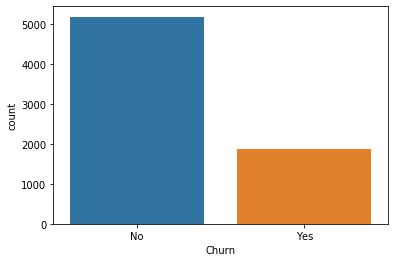

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64


(No     5174
 Yes    1869
 Name: Churn, dtype: int64, None)

In [394]:
sns.countplot(df_churn['Churn'])
plt.show()
df_churn['Churn'].value_counts() , print(df_churn['Churn'].value_counts(normalize=True))


We can see that only 1869 person which is around 27% are churning

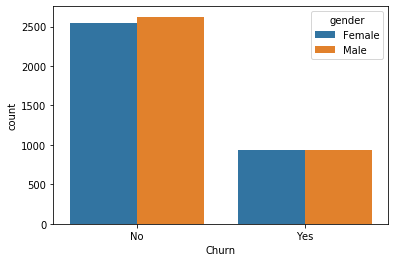

In [395]:
sns.countplot(hue='gender',x='Churn',data=df_churn)
plt.show()

We can see that approx same number of Male and Female who churn

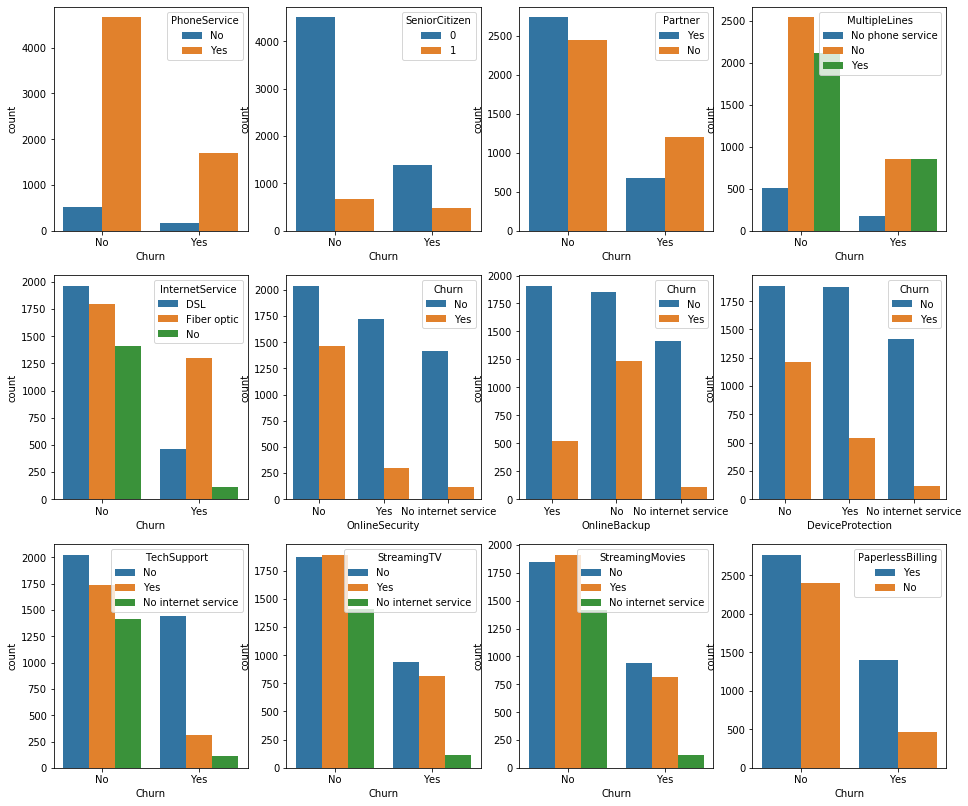

In [396]:
#Plotting for each factors with respect to Churn to get the insight 
fig, ax =plt.subplots(3,4,figsize=(16,14))
sns.countplot(hue='PhoneService',x='Churn',data=df_churn, ax=ax[0,0])
sns.countplot(hue='SeniorCitizen',x='Churn',data=df_churn,ax=ax[0,1])
sns.countplot(hue='Partner',x='Churn',data=df_churn,ax=ax[0,2])
sns.countplot(hue='MultipleLines',x='Churn',data=df_churn,ax=ax[0,3])
sns.countplot(hue='InternetService',x='Churn',data=df_churn,ax=ax[1,0])
sns.countplot(x='OnlineSecurity',hue='Churn',data=df_churn,ax=ax[1,1])
sns.countplot(x='OnlineBackup',hue='Churn',data=df_churn,ax=ax[1,2])
sns.countplot(x='DeviceProtection',hue='Churn',data=df_churn,ax=ax[1,3])
sns.countplot(hue='TechSupport',x='Churn',data=df_churn,ax=ax[2,0])
sns.countplot(hue='StreamingTV',x='Churn',data=df_churn,ax=ax[2,1])
sns.countplot(hue='StreamingMovies',x='Churn',data=df_churn,ax=ax[2,2])
sns.countplot(hue='PaperlessBilling',x='Churn',data=df_churn,ax=ax[2,3])
fig.show()
plt.show()


From these plots we can conclude that not every factor but some factors have strong relation with the churn rate of customers
Some of we can see that:


-Customer who are senior citizens are less likely to churn

-Customer who don't have a partner are more likely to churn

-Customer with High speed fiber optics Internet connection are more likely to churn as it fullfill the need of data in daily life.

-Customer with No TechSUpport are more likely to churn

-Customer with Paper billing are more likely to churn then who have digital billing.


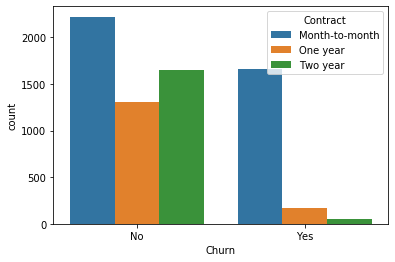

In [397]:
sns.countplot(x='Churn',hue='Contract',data=df_churn)
plt.show()

We can see that customers who are on Monthly contract are more and more likely to churn then who are on 1 year and 2 year contract

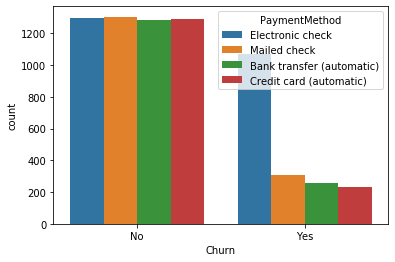

In [398]:
sns.countplot(x='Churn',hue='PaymentMethod',data=df_churn)
plt.show()

We can see that customers whose payment method is Electronic Cheque are more likely to churn as compared to other mode of Payment

In [399]:
def Kdeplot(x):
    fig = plt.figure(figsize=(10,4))
    ax=sns.kdeplot(df_churn.loc[(df_churn['Churn'] == 'No'),x] , color='b',shade=True, label='Not Churned') 
    ax=sns.kdeplot(df_churn.loc[(df_churn['Churn'] == 'Yes'),x] , color='r',shade=True, label='Churned')
    plt.title(' Churn rate with respect to {}'.format(x))

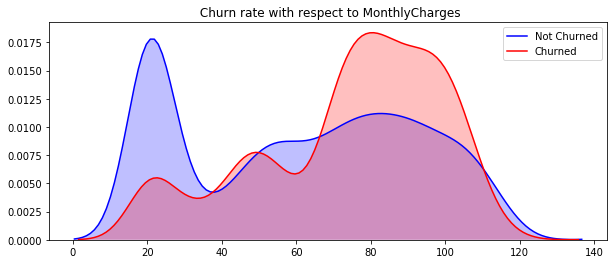

In [400]:
Kdeplot('MonthlyCharges')

We can see that the customer with Monthly charges ranging from 60-120 are more likely to churn

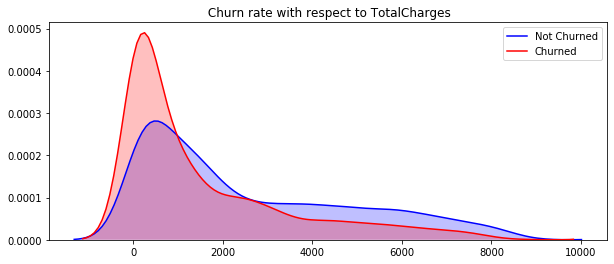

In [401]:
Kdeplot('TotalCharges')

In [402]:
df_churn.dtypes
   

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Now we have to encode all the object datatypes to int/float in order to train our model

In [403]:
#Dropping some useless data columns
df_churn.drop('customerID',axis=1,inplace=True)

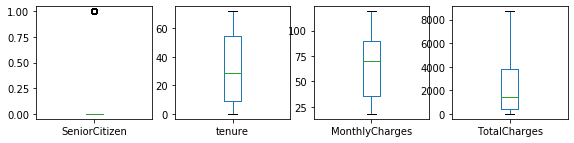

In [404]:
#Checking for outliers
df_churn.plot(kind='box',subplots=True,layout=(5,5),figsize=(12,12))
plt.show()

We can see that nearly no outliers are there in our dataset

In [406]:
#Separating the input and ouput variable
df_x=df_churn.drop(columns=['Churn'])
y=df_churn['Churn']

In [407]:
#Creating dummy variables to encode the object type data using one hot endcoding technique
df_x=pd.get_dummies(df_x,drop_first=True)

In [408]:
# Encoding resulant variable using Laber Encoder
from sklearn.preprocessing import LabelEncoder
y=LabelEncoder().fit_transform(y)

In [409]:
df_x.shape

(7043, 29)

We cans see that columns are increased from 14 to 29 because of one hot encoding

In [413]:
#Using standard scalar method to Normalize our data or to bring all variable to common scale
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(df_x)
x=pd.DataFrame(x)

In [414]:
#Importing various neccessary parameters/fetures
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score 
import warnings
warnings.filterwarnings("ignore")

In [415]:
#Checking for best random state which give best accuracy/f1 score for various training techniques used to get best prediction
# Defining a class to check for best random state and f1 score.
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
def maxf1_score(tec,x,y):
    maxf1=0
    rand=0
    for r_state in range(42,100):
        train_x,test_x,train_y,test_y=train_test_split(x, y,random_state = r_state,test_size=0.20,stratify=y)
        tec.fit(train_x,train_y)
        y_pred=tec.predict(test_x)
        temp=f1_score(test_y,y_pred)
        if temp>maxf1:
            maxf1=temp
            rand=r_state
    print("Maximum f1_score is: ",maxf1, "at random state : ",rand)

In [416]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_val_score
import sklearn.naive_bayes

In [417]:
train_x,test_x,train_y,test_y=train_test_split(x, y,test_size=0.20,stratify=y,random_state=42)

In [418]:
LR=LogisticRegression()
maxf1_score(LR,df_x,y)

Maximum f1_score is:  0.6286549707602338 at random state :  75


In [419]:
DT=DecisionTreeClassifier()
maxf1_score(DT,x,y)

Maximum f1_score is:  0.5480153649167734 at random state :  66


In [420]:
KN=KNeighborsClassifier()
maxf1_score(KN,x,y)

Maximum f1_score is:  0.5672043010752689 at random state :  77


In [421]:
SV=SVC()
maxf1_score(SV,x,y)

Maximum f1_score is:  0.608955223880597 at random state :  94


In [422]:
RF=RandomForestClassifier()
maxf1_score(RF,x,y)

Maximum f1_score is:  0.5525902668759811 at random state :  80


In [423]:
GN=GaussianNB()
maxf1_score(GN,x,y)

Maximum f1_score is:  0.6061151079136691 at random state :  64


In [425]:
models=[]
models.append(('DecisionTreeClassifier', DT))
models.append(('SVC', SV))
models.append(('KNeighborsClassifier',KN))
models.append(('GaussianNB', GN))
models.append(('LogisticRegression', LR))
models.append(('RandomForestClassifier', RF))

**************** DecisionTreeClassifier ****************


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


Accuracy Score =  0.7295954577714692


Cross Value Score =  0.7347673775144379


roc_auc_score =  0.6571339998449973


Classification_report 
               precision    recall  f1-score   support

           0       0.82      0.81      0.82      1035
           1       0.49      0.50      0.50       374

    accuracy                           0.73      1409
   macro avg       0.65      0.66      0.66      1409
weighted avg       0.73      0.73      0.73      1409



[[840 195]
 [186 188]]


AxesSubplot(0.125,0.808774;0.62x0.071

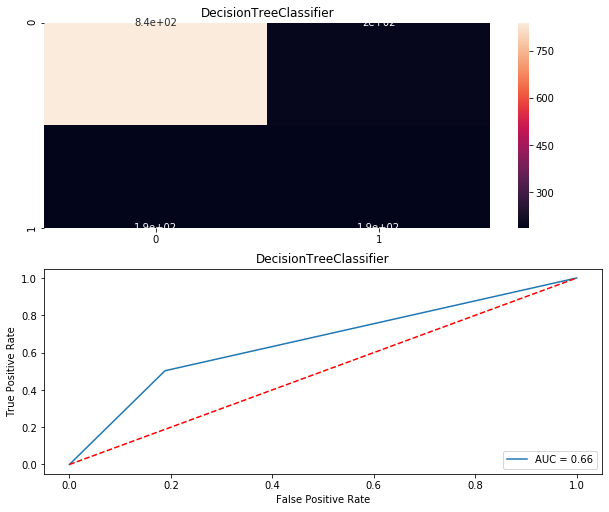

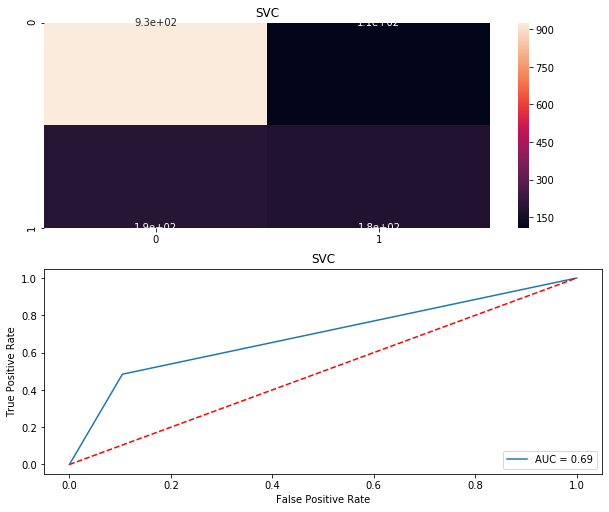

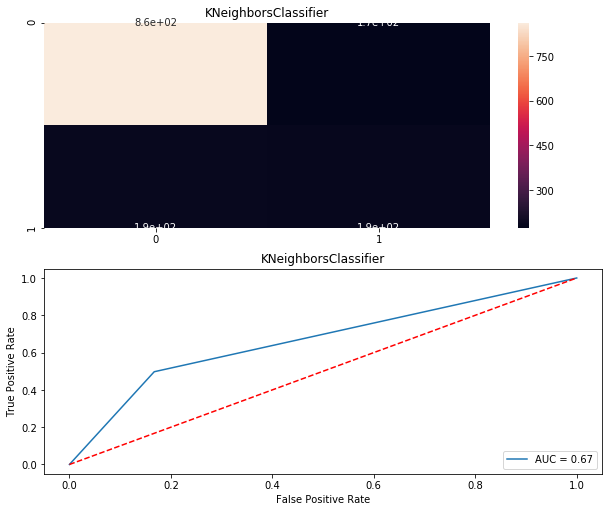

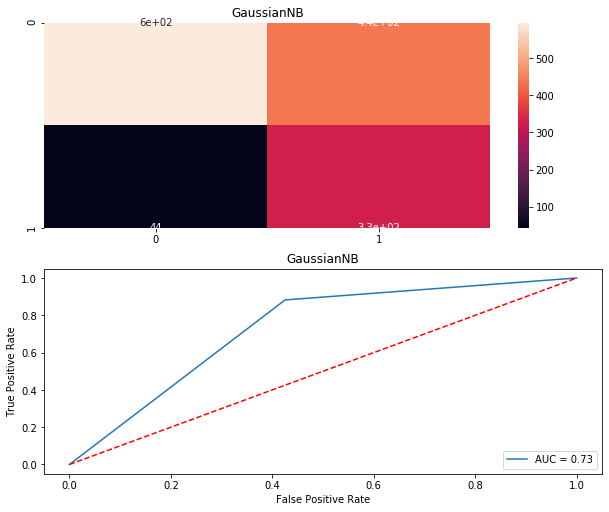

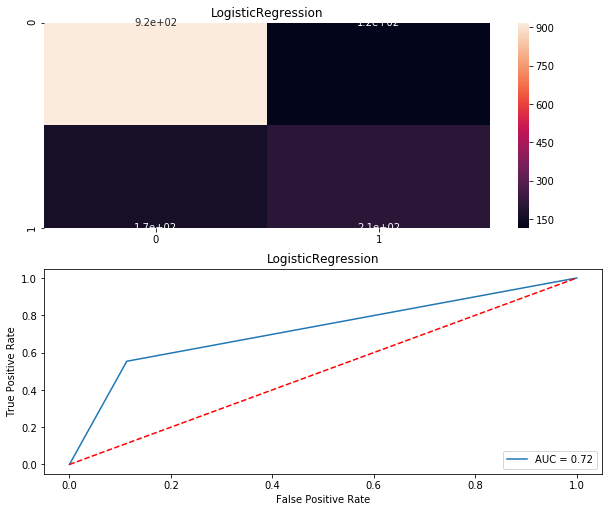

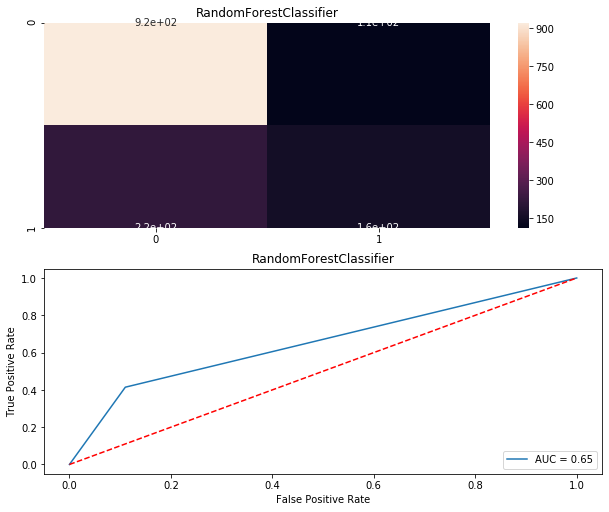

In [426]:
Model=[]
Score=[]
CVS=[]
rocscore=[]
for name,model in models:
    print('****************', name, '****************')
    print('\n')
    Model.append(name)
    model.fit(train_x,train_y)
    print(model)
    pre=model.predict(test_x)
    print('\n')
    AS= accuracy_score(test_y,pre)
    print('Accuracy Score = ', AS)
    Score.append(AS*100)
    print('\n')
    SC=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('Cross Value Score = ', SC)
    CVS.append(SC*100)
    print('\n')
    false_positive_rate, true_positive_rate,thresolds= roc_curve(test_y,pre)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score = ', roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('Classification_report \n', classification_report(test_y,pre))
    print('\n')
    cm= confusion_matrix(test_y,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [427]:
result= pd.DataFrame({'Model' : Model, 'Accuracy_Score' : Score, 'Cross_val_score' : CVS, 'Roc_auc_curve': rocscore})
result

,Model,Accuracy_Score,Cross_val_score,Roc_auc_curve
0,DecisionTreeClassifier,72.959546,73.476738,65.713400
1,SVC,78.637331,79.852003,68.980470
2,KNeighborsClassifier,74.378992,75.664139,66.508822
3,GaussianNB,65.649397,65.667217,72.861608
4,LogisticRegression,79.843861,80.206935,72.021623
5,RandomForestClassifier,76.366217,78.091344,65.214679


We can see that we are getting almost best accuracy score of approx 80% , cross validation score of 81% and Roc auc score of  72% with Logistic Regression , we can save our final model now

In [428]:
# Saving our final model using Joblib
from sklearn.externals import joblib 
  

joblib.dump(LR, 'LR_Telecom-Churn.pkl')

['LR_Telecom-Churn.pkl']

**This is the best and final model we have saved**